In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [271]:
fashion_train_df = pd.read_csv('dataset/fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('dataset/fashion-mnist_test.csv')

In [272]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [273]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
fashion_train_df.shape

(60000, 785)

In [ ]:
fashion_train_df.describe

In [18]:
fashion_test_df.shape

(10000, 785)

In [276]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

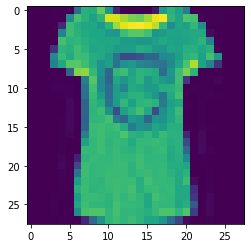

In [20]:
import random
i = random.randint(1,60000)
plt.imshow((training[i,1:]).reshape(28,28))

<Figure size 432x288 with 0 Axes>

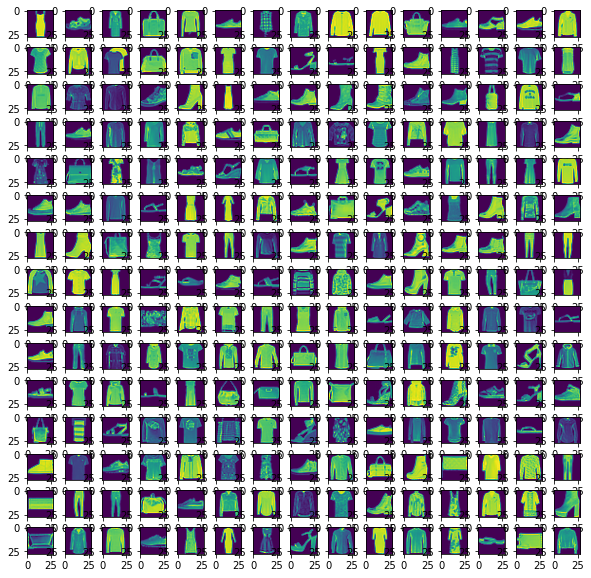

In [439]:
width_size = 15
height_size = 15
n_training = len(training)
plt.figure()
fig, axes = plt.subplots(width_size, height_size,figsize = (10,10))
#flatten the matrix of images to array by revel method
axes = axes.ravel()
for i in np.arange(0, width_size * height_size):
    index = np.random.randint(0, n_training)
    axes[i].imshow((training[index,1:]).reshape(28,28))
plt.subplots_adjust(hspace = 0.4)


In [22]:
#Modelling

In [501]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [502]:
X_train.shape

(60000, 784)

In [503]:
X_test = testing[:,1:]/255
y_test = testing[:,0]


In [504]:
X_test.shape

(10000, 784)

In [505]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate  = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [506]:
X_train.shape

(48000, 784)

In [507]:
X_validate.shape

(12000, 784)

In [508]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))

In [509]:
X_train.shape

(48000, 28, 28, 1)

In [510]:
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [511]:
X_test.shape

(10000, 28, 28, 1)

In [512]:
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [513]:
X_validate.shape

(12000, 28, 28, 1)

In [514]:
import keras

In [515]:
from keras.models import Sequential

In [516]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [517]:
from keras.optimizers import Adam


In [571]:
from keras.callbacks import TensorBoard

In [572]:
cnn_model = Sequential()

In [573]:
# Add convolution layers first
cnn_model.add(Conv2D(64,3,3,input_shape = (28,28,1), activation = 'relu'))

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [574]:
cnn_model.add(MaxPooling2D(pool_size =(2,2)))

In [575]:
cnn_model.add(Flatten())

In [576]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [577]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [578]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [579]:
epochs = 50

In [ ]:
cnn_model.fit(X_train, y_train,
              batch_size = 512,
              epochs = epochs,
              verbose = 1,
              validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 26s 536us/step - loss: 0.8372 - accuracy: 0.7061 - val_loss: 0.4747 - val_accuracy: 0.8293
Epoch 2/50
48000/48000 [==============================] - 26s 537us/step - loss: 0.4420 - accuracy: 0.8439 - val_loss: 0.4061 - val_accuracy: 0.8612
Epoch 3/50
48000/48000 [==============================] - 32s 665us/step - loss: 0.3933 - accuracy: 0.8621 - val_loss: 0.3784 - val_accuracy: 0.8697
Epoch 4/50
48000/48000 [==============================] - 30s 628us/step - loss: 0.3642 - accuracy: 0.8742 - val_loss: 0.3541 - val_accuracy: 0.8767
Epoch 5/50
48000/48000 [==============================] - 25s 515us/step - loss: 0.3390 - accuracy: 0.8810 - val_loss: 0.3267 - val_accuracy: 0.8875
Epoch 6/50
48000/48000 [==============================] - 24s 509us/step - loss: 0.3205 - accuracy: 0.8875 - val_loss: 0.3165 - val_accuracy: 0.8910
Epoch 7/50
48000/48000 [==============================] 

In [570]:
accuracy = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(accuracy[1]))

10000/10000 [==============================] - 1s 114us/step
Test Accuracy: 0.867


In [540]:
predict_classes = cnn_model.predict_classes(X_test)

In [541]:
predict_classes.sum()

44085

In [531]:
y_test[0].sum()


0.0

In [532]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

In [533]:
X_test.shape


(10000, 28, 28, 1)

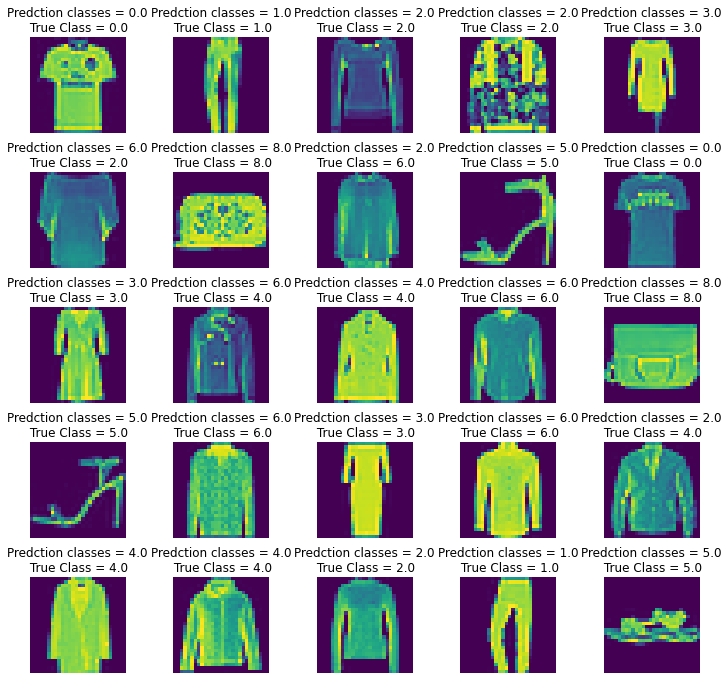

In [534]:
L = 5
W = 5
fig, axes = plt.subplots(L,W, figsize =(12,12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predction classes = {:0.1f}\n True Class = {:0.1f}".format(predict_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)

In [535]:
X_test[1,0:].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.81960785, 0.74509805, 0.70980394, 0.5882353 ,
        0.6666667 , 0.75686276, 0.7058824 , 0.85882354, 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09411765, 0.92156863, 0.8235294 , 0.94509804, 0.87058824,
        0.67058825, 0.8627451 , 0.78039217, 0.9254902 , 0.10588235,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40392157, 0.8901961 , 0.8509804 , 0.85490197, 0.87058824,
        0.7411765 , 0.8470

In [536]:
X_test[1,0:].shape

(28, 28, 1)

In [537]:
X_test[1].shape

(28, 28, 1)

In [538]:
y_test[1]

1.0

In [539]:
y

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

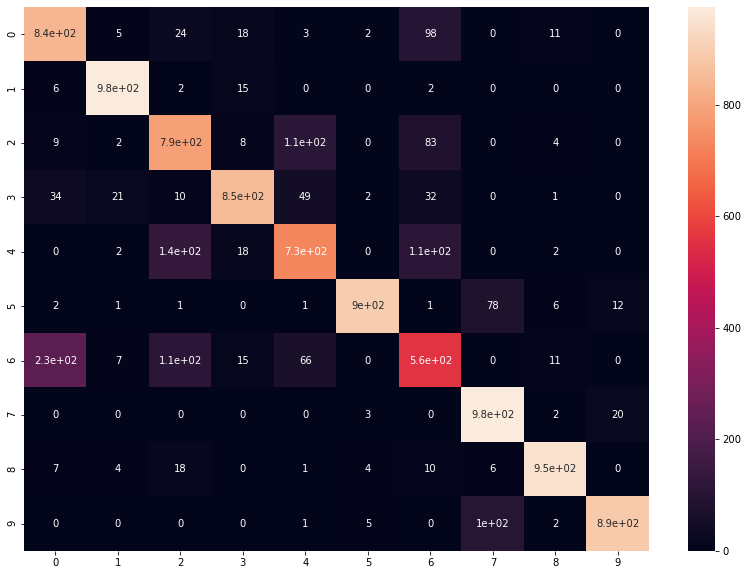

In [544]:
#Improving the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot = True)

In [548]:
from sklearn.metrics import classification_report

In [559]:
classes = ["class {}".format(i) for i in range(10)]
classes

['class 0',
 'class 1',
 'class 2',
 'class 3',
 'class 4',
 'class 5',
 'class 6',
 'class 7',
 'class 8',
 'class 9']

In [562]:
print(classification_report(y_test, predict_classes, target_names = classes))

              precision    recall  f1-score   support

     class 0       0.74      0.84      0.79      1000
     class 1       0.96      0.97      0.97      1000
     class 2       0.72      0.79      0.75      1000
     class 3       0.92      0.85      0.88      1000
     class 4       0.76      0.73      0.75      1000
     class 5       0.98      0.90      0.94      1000
     class 6       0.62      0.56      0.59      1000
     class 7       0.84      0.97      0.90      1000
     class 8       0.96      0.95      0.96      1000
     class 9       0.97      0.89      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [ ]:
#Improving CNN by change the number of filters and the the depth of filter
